In [1]:
import time
import requests
from IPython.core.display import Image
from multiprocessing import Process

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium import webdriver
from IPython.core.display import Image, display
import pandas as pd

options = Options()
options.headless = True # headless means "no graphical interface"
service = Service(executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options, service=service)

def visit(url, source=False):
    if source:
        r = requests.get(url)
        return r.text
    else:
        b.get(url)
        b.save_screenshot("tmp.png")
        return Image("tmp.png")

/tmp/ipykernel_1561/3511333344.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import Image, display


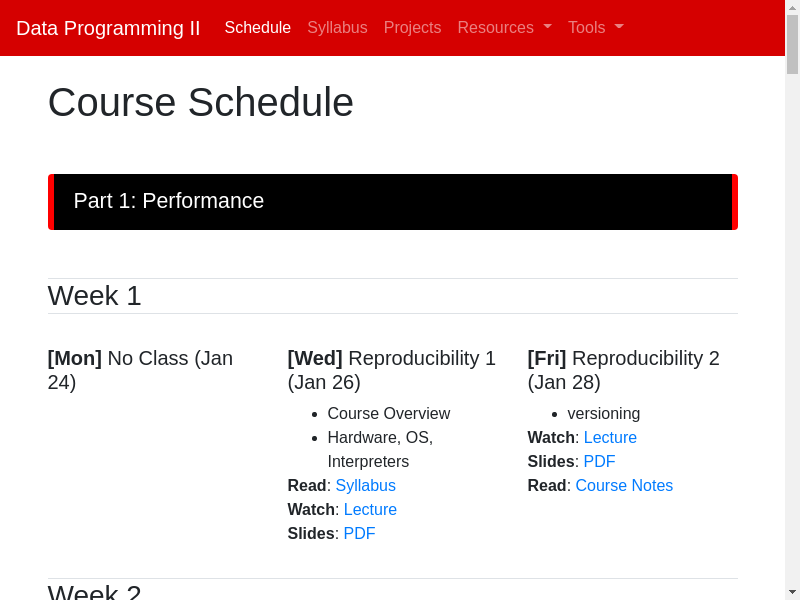

In [2]:
visit("https://tyler.caraza-harter.com/cs320/s22/schedule.html")

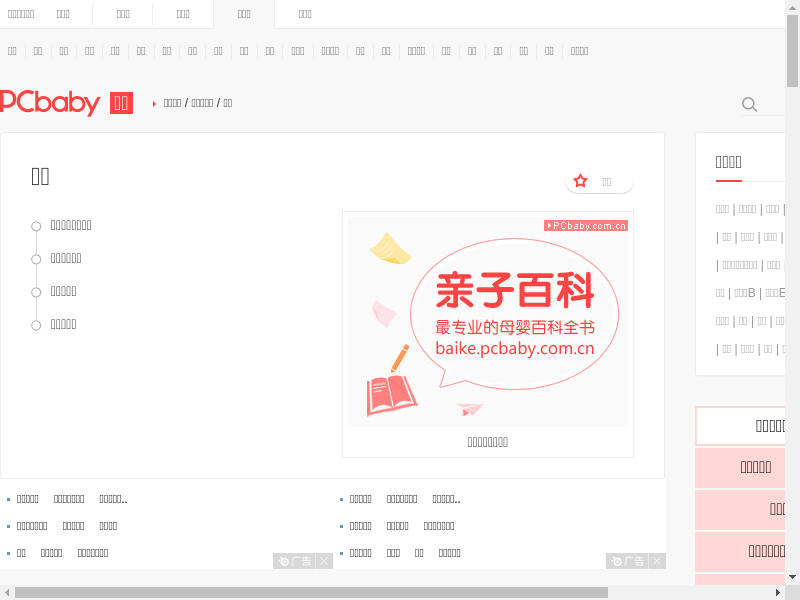

In [3]:
visit("https://baike.pcbaby.com.cn/qzbd/175780.html")

In [4]:
print(visit("https://tyler.caraza-harter.com/cs320/s22/schedule.html", source=True)[:500] + "\n...")

<!doctype html>
<html lang="en">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <meta name="description" content="">
    <meta name="author" content="">

    <!-- Google Auth stuff -->
    <meta name="google-signin-scope" content="profile email">
    <meta name="google-signin-client_id" content="531980636037-3a6miiekf2ao8d0n7qv1fkrev8cbvvdt.apps.googleusercontent.com">

    <title>Tyler R. Caraza-Harter</title>


...


In [5]:
from flask import Flask, request

my320app = Flask("example-server")
type(my320app)

flask.app.Flask

In [6]:
@my320app.route("/")
def home():
    return "Home"

@my320app.route("/hello.html")
def handler1():
    return '<html><body style="background-color:lightblue"><i>hello</i><body></html>'

@my320app.route("/world.html")
def handler2():
    return '<html><body style="background-color:lightgreen"><h1>world</h1><body></html>'

#if __name__ == '__main__':
#    app.run("0.0.0.0", "5000")

In [7]:
p = Process(target=my320app.run)
p.start()
time.sleep(1) # give it time to get going

 * Serving Flask app 'example-server'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Oct/2022 15:54:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2022 15:54:15] "GET /hello.html HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2022 15:54:15] "GET /world.html HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2022 15:54:15] "GET /missing.html HTTP/1.1" 404 -
127.0.0.1 - - [28/Oct/2022 15:54:15] "GET /hello.html HTTP/1.1" 200 -
127.0.0.1 - - [28/Oct/2022 15:54:16] "GET /world.html HTTP/1.1" 200 -


In [8]:
visit("http://127.0.0.1:5000/", source=True) # calls "home" function after @my320app.route("/")

'Home'

In [9]:
visit("http://127.0.0.1:5000/hello.html", source=True) # calls handler1

'<html><body style="background-color:lightblue"><i>hello</i><body></html>'

In [10]:
visit("http://127.0.0.1:5000/world.html", source=True) # calls handle

'<html><body style="background-color:lightgreen"><h1>world</h1><body></html>'

In [11]:
visit("http://127.0.0.1:5000/missing.html", source=True)

'<!doctype html>\n<html lang=en>\n<title>404 Not Found</title>\n<h1>Not Found</h1>\n<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>\n'

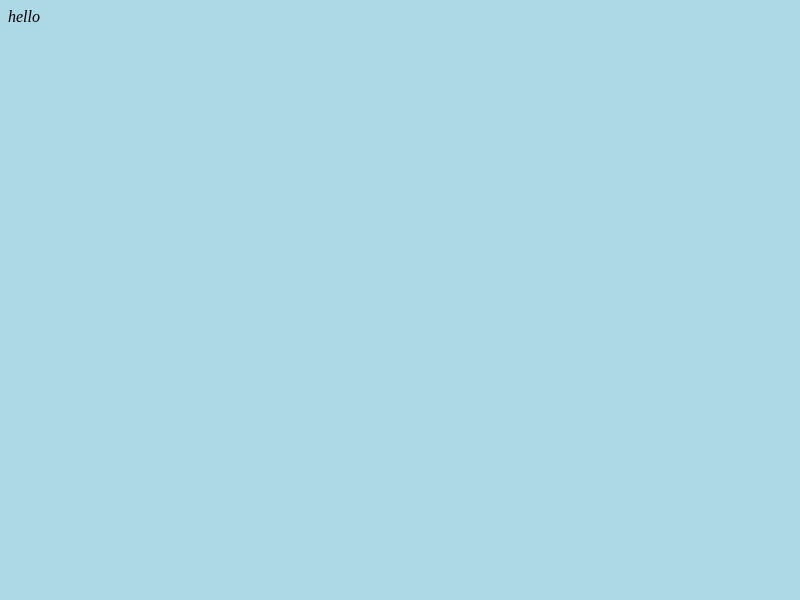

In [12]:
visit("http://127.0.0.1:5000/hello.html")

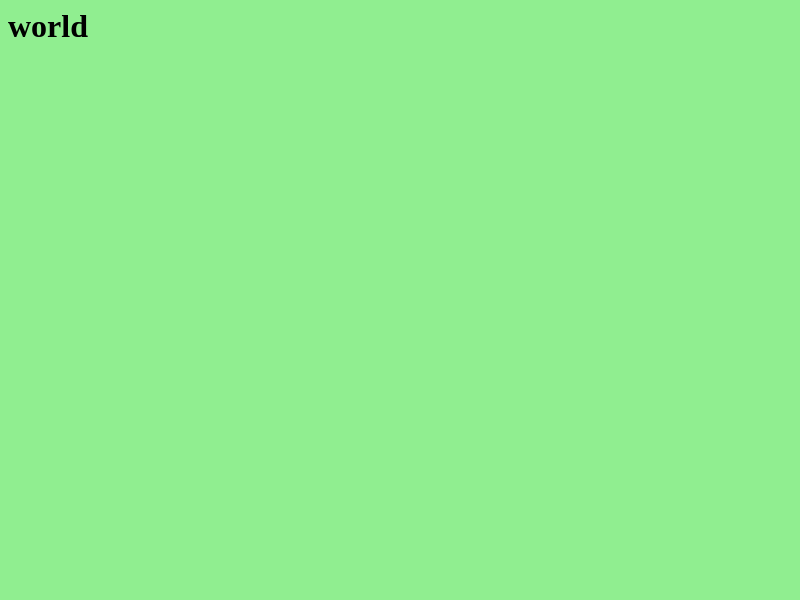

In [13]:
visit("http://127.0.0.1:5000/world.html")

In [14]:
try:
    my320app.run("127.0.0.1", "5000")
except OSError as e:
    print(e)

 * Serving Flask app 'example-server'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 

In [15]:
p.terminate()

In [16]:
app2 = Flask("example-server")

@app2.route("/hello.html")
def welcome():
    print(request.args)
    username = request.args["name"]
    return f'<h1>Welcome {username}!</h1>'

p = Process(target=app2.run)
p.start()
time.sleep(1) # give it time to get going

 * Serving Flask app 'example-server'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


ImmutableMultiDict([('name', 'tyler')])


127.0.0.1 - - [28/Oct/2022 15:54:37] "GET /hello.html?name=tyler HTTP/1.1" 200 -


ImmutableMultiDict([('name', 'tyler')])


127.0.0.1 - - [28/Oct/2022 15:54:39] "GET /hello.html?name=tyler HTTP/1.1" 200 -


In [17]:
visit("http://127.0.0.1:5000/hello.html?name=tyler", source=True)

'<h1>Welcome tyler!</h1>'

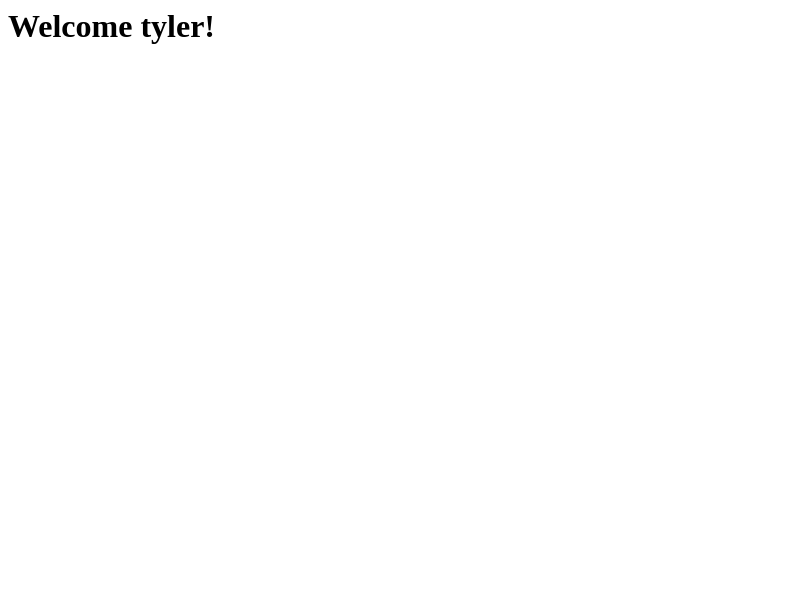

In [18]:
visit("http://127.0.0.1:5000/hello.html?name=tyler")